In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import joblib

In [2]:
def Importdata(file):
    """
    Function for import data and drop duplicate
    param : Function (file<input file name>) just format (csv)
    return data
    """
    
    data = pd.read_csv(file, encoding= 'unicode_escape' )
    print("Data real            : ", data.shape, "- (#observation, #column)")

    data = data.drop_duplicates()
    print("after drop data : ", data.shape, "- (#observation, #column)")
    
    return data

# Data Manipulation

In [3]:
#input
file_data = "SeoulBikeData.csv"

#call function
data_analisa = Importdata(file = file_data)

Data real            :  (8760, 14) - (#observation, #column)
after drop data :  (8760, 14) - (#observation, #column)


In [4]:
data_analisa.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Check missing nulls
data_analisa.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [6]:
# check inconsistensi data
data_analisa['Seasons'].unique()
data_analisa['Holiday'].unique()
data_analisa['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
# change dtypes

data_analisa['Rainfall(mm)'].astype('int64')

0       0
1       0
2       0
3       0
4       0
       ..
8755    0
8756    0
8757    0
8758    0
8759    0
Name: Rainfall(mm), Length: 8760, dtype: int64

In [8]:
# check tipe data
data_analisa.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [9]:
# drop data
data_analisa = data_analisa.drop(columns=['Date'])

In [10]:
data_analisa.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [11]:
# make simplify data hour to kategori
# 00.00AM - 06.00AM is Dini Hari
# 06.00AM - 12.00AM is Pagi Hari
# 12.00PM - 18.00PM is Siang Hari
# 18.00PM - 00.00PM is Malam Hari

def mapping(Hour):
    """
    Function for calculation range hour make
    to simplify data column
    """
    if Hour <= 6:
        return "Dini Hari"
    elif Hour <= 12:
        return "Pagi Hari"
    elif Hour <= 18:
        return "Siang Hari"
    else:
        return "Malam Hari"

# call function
data_analisa["Hour"] = data_analisa["Hour"].map(mapping)

In [12]:
data_analisa.dtypes

Rented Bike Count              int64
Hour                          object
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [13]:
data_analisa.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,Dini Hari,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,Dini Hari,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# EDA

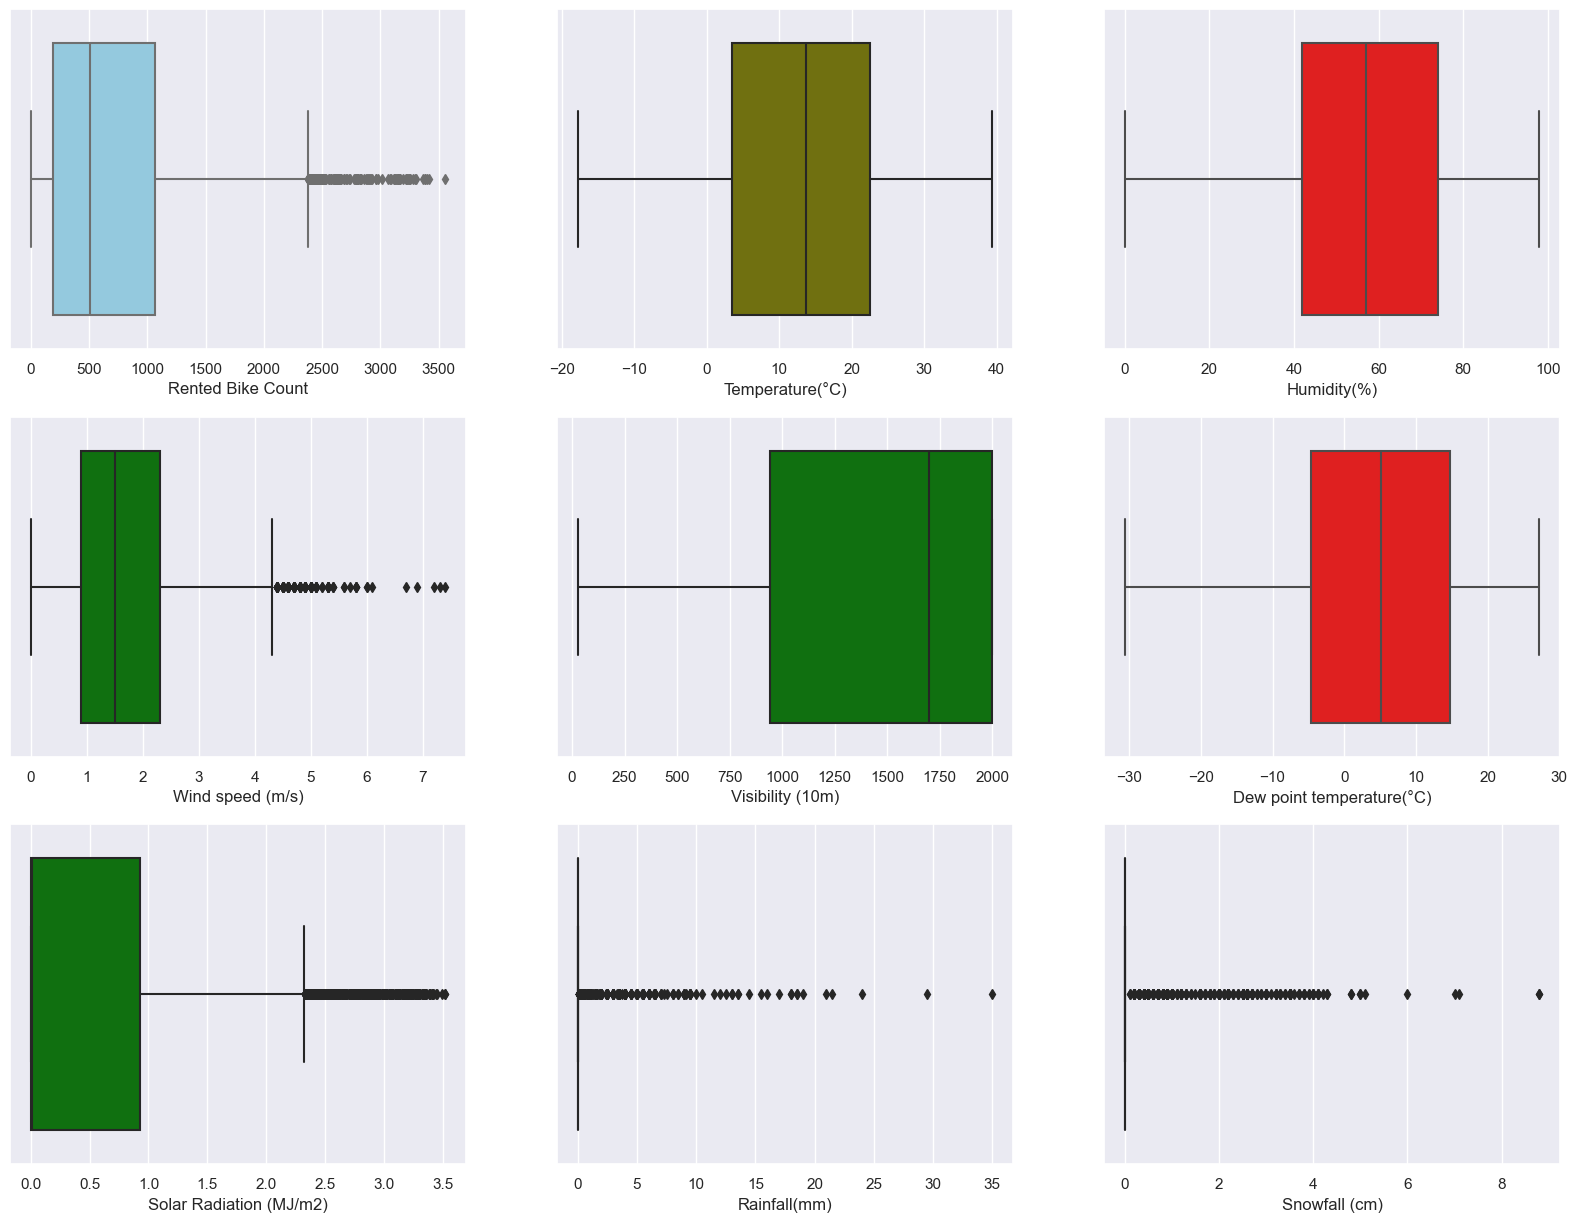

In [14]:
# check Boxplot / outlier
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 3, figsize=(20, 15))

sns.boxplot(data=data_analisa, x="Rented Bike Count", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=data_analisa, x="Temperature(°C)", color="olive", ax=axs[0, 1])
sns.boxplot(data=data_analisa, x="Humidity(%)", color="red", ax=axs[0, 2])
sns.boxplot(data=data_analisa, x="Wind speed (m/s)", color="green", ax=axs[1, 0])
sns.boxplot(data=data_analisa, x="Visibility (10m)", color="green", ax=axs[1, 1])
sns.boxplot(data=data_analisa, x="Dew point temperature(°C)", color="red", ax=axs[1, 2])
sns.boxplot(data=data_analisa, x="Solar Radiation (MJ/m2)", color="green", ax=axs[2, 0])
sns.boxplot(data=data_analisa, x="Rainfall(mm)", color="green", ax=axs[2, 1])
sns.boxplot(data=data_analisa, x="Snowfall (cm)", color="green", ax=axs[2, 2])

plt.show()

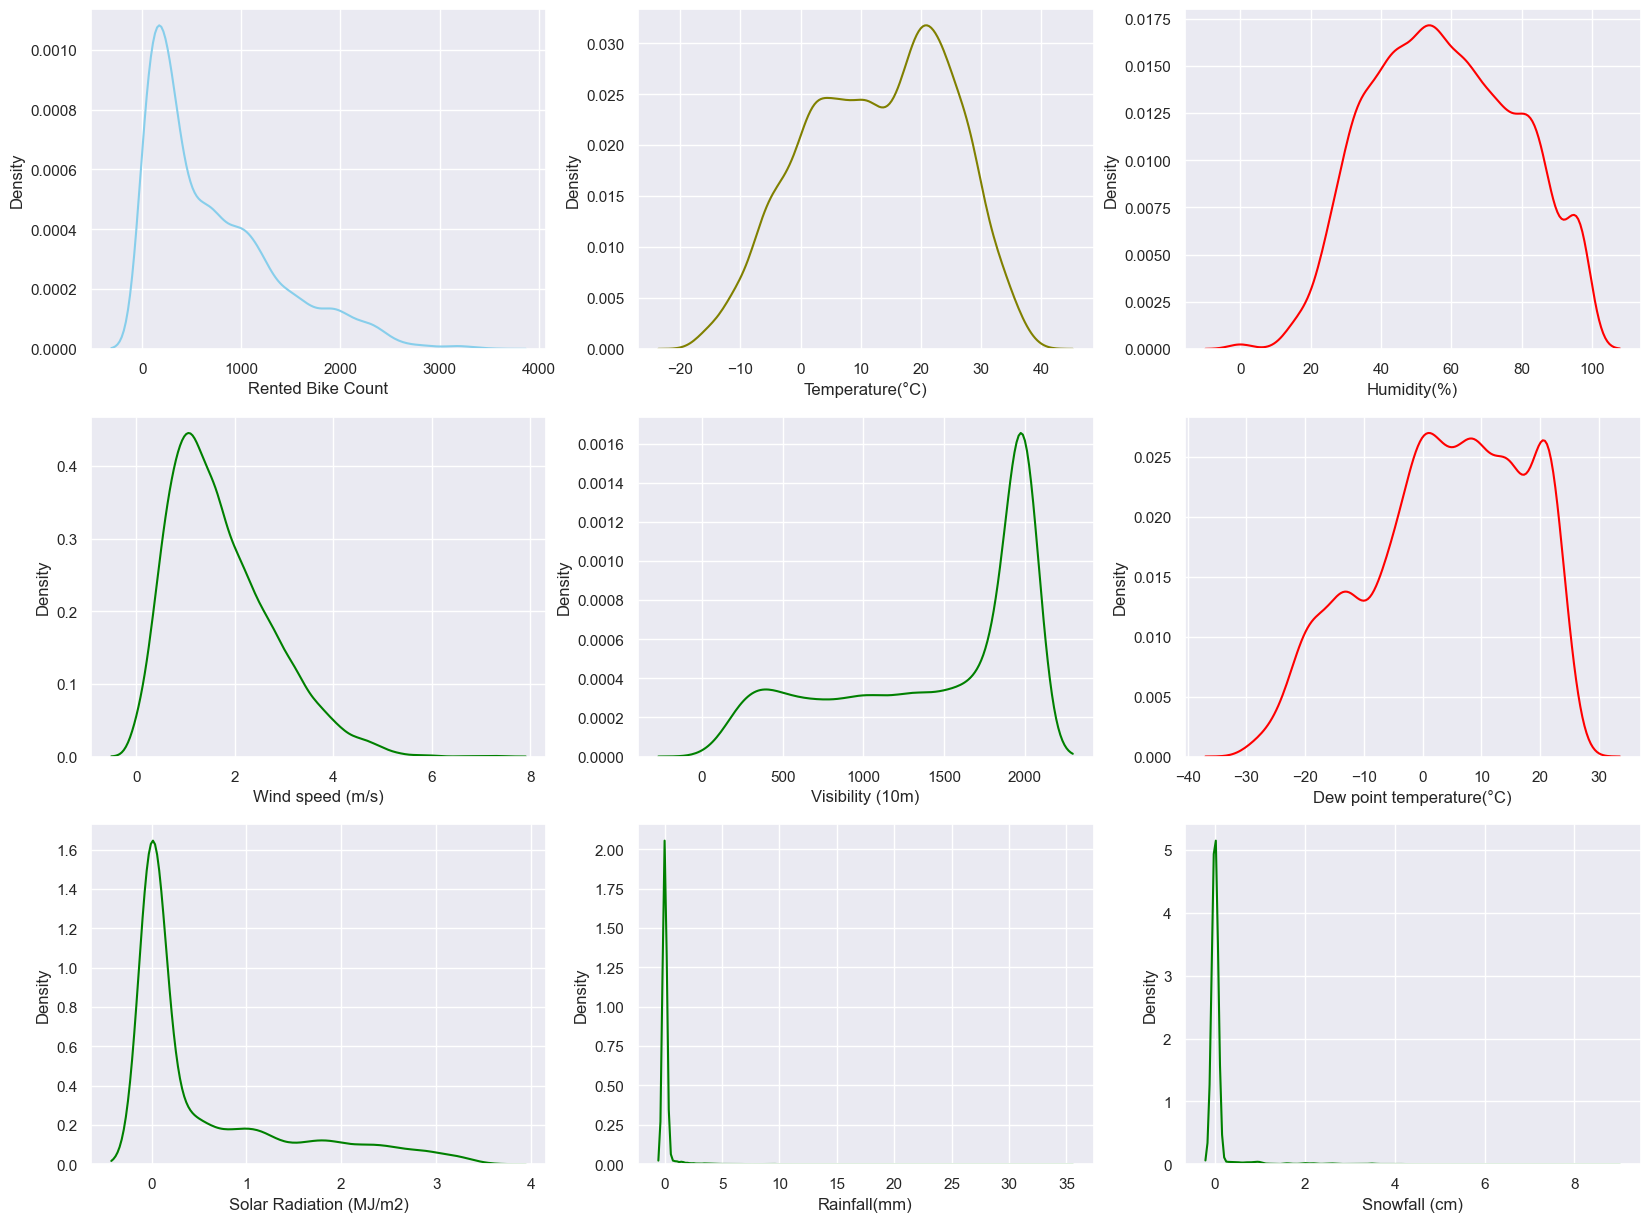

In [15]:
# check distribution

# check Boxplot / outlier
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 3, figsize=(20, 15))

sns.kdeplot(data=data_analisa, x="Rented Bike Count", color="skyblue", ax=axs[0, 0])
sns.kdeplot(data=data_analisa, x="Temperature(°C)", color="olive", ax=axs[0, 1])
sns.kdeplot(data=data_analisa, x="Humidity(%)", color="red", ax=axs[0, 2])
sns.kdeplot(data=data_analisa, x="Wind speed (m/s)", color="green", ax=axs[1, 0])
sns.kdeplot(data=data_analisa, x="Visibility (10m)", color="green", ax=axs[1, 1])
sns.kdeplot(data=data_analisa, x="Dew point temperature(°C)", color="red", ax=axs[1, 2])
sns.kdeplot(data=data_analisa, x="Solar Radiation (MJ/m2)", color="green", ax=axs[2, 0])
sns.kdeplot(data=data_analisa, x="Rainfall(mm)", color="green", ax=axs[2, 1])
sns.kdeplot(data=data_analisa, x="Snowfall (cm)", color="green", ax=axs[2, 2])

plt.show()

In [16]:
# check mean and median
r_m = data_analisa['Rented Bike Count'].median()
h_m = data_analisa['Humidity(%)'].mean()
T_m = data_analisa['Temperature(°C)'].median()
H_m = data_analisa['Humidity(%)'].median()
w_m = data_analisa['Wind speed (m/s)'].median()
v_m = data_analisa['Visibility (10m)'].median()
d_m = data_analisa['Dew point temperature(°C)'].median()
s_m = data_analisa['Solar Radiation (MJ/m2)'].median()
R_m = data_analisa['Rainfall(mm)'].median()
S_M = data_analisa['Snowfall (cm)'].median()

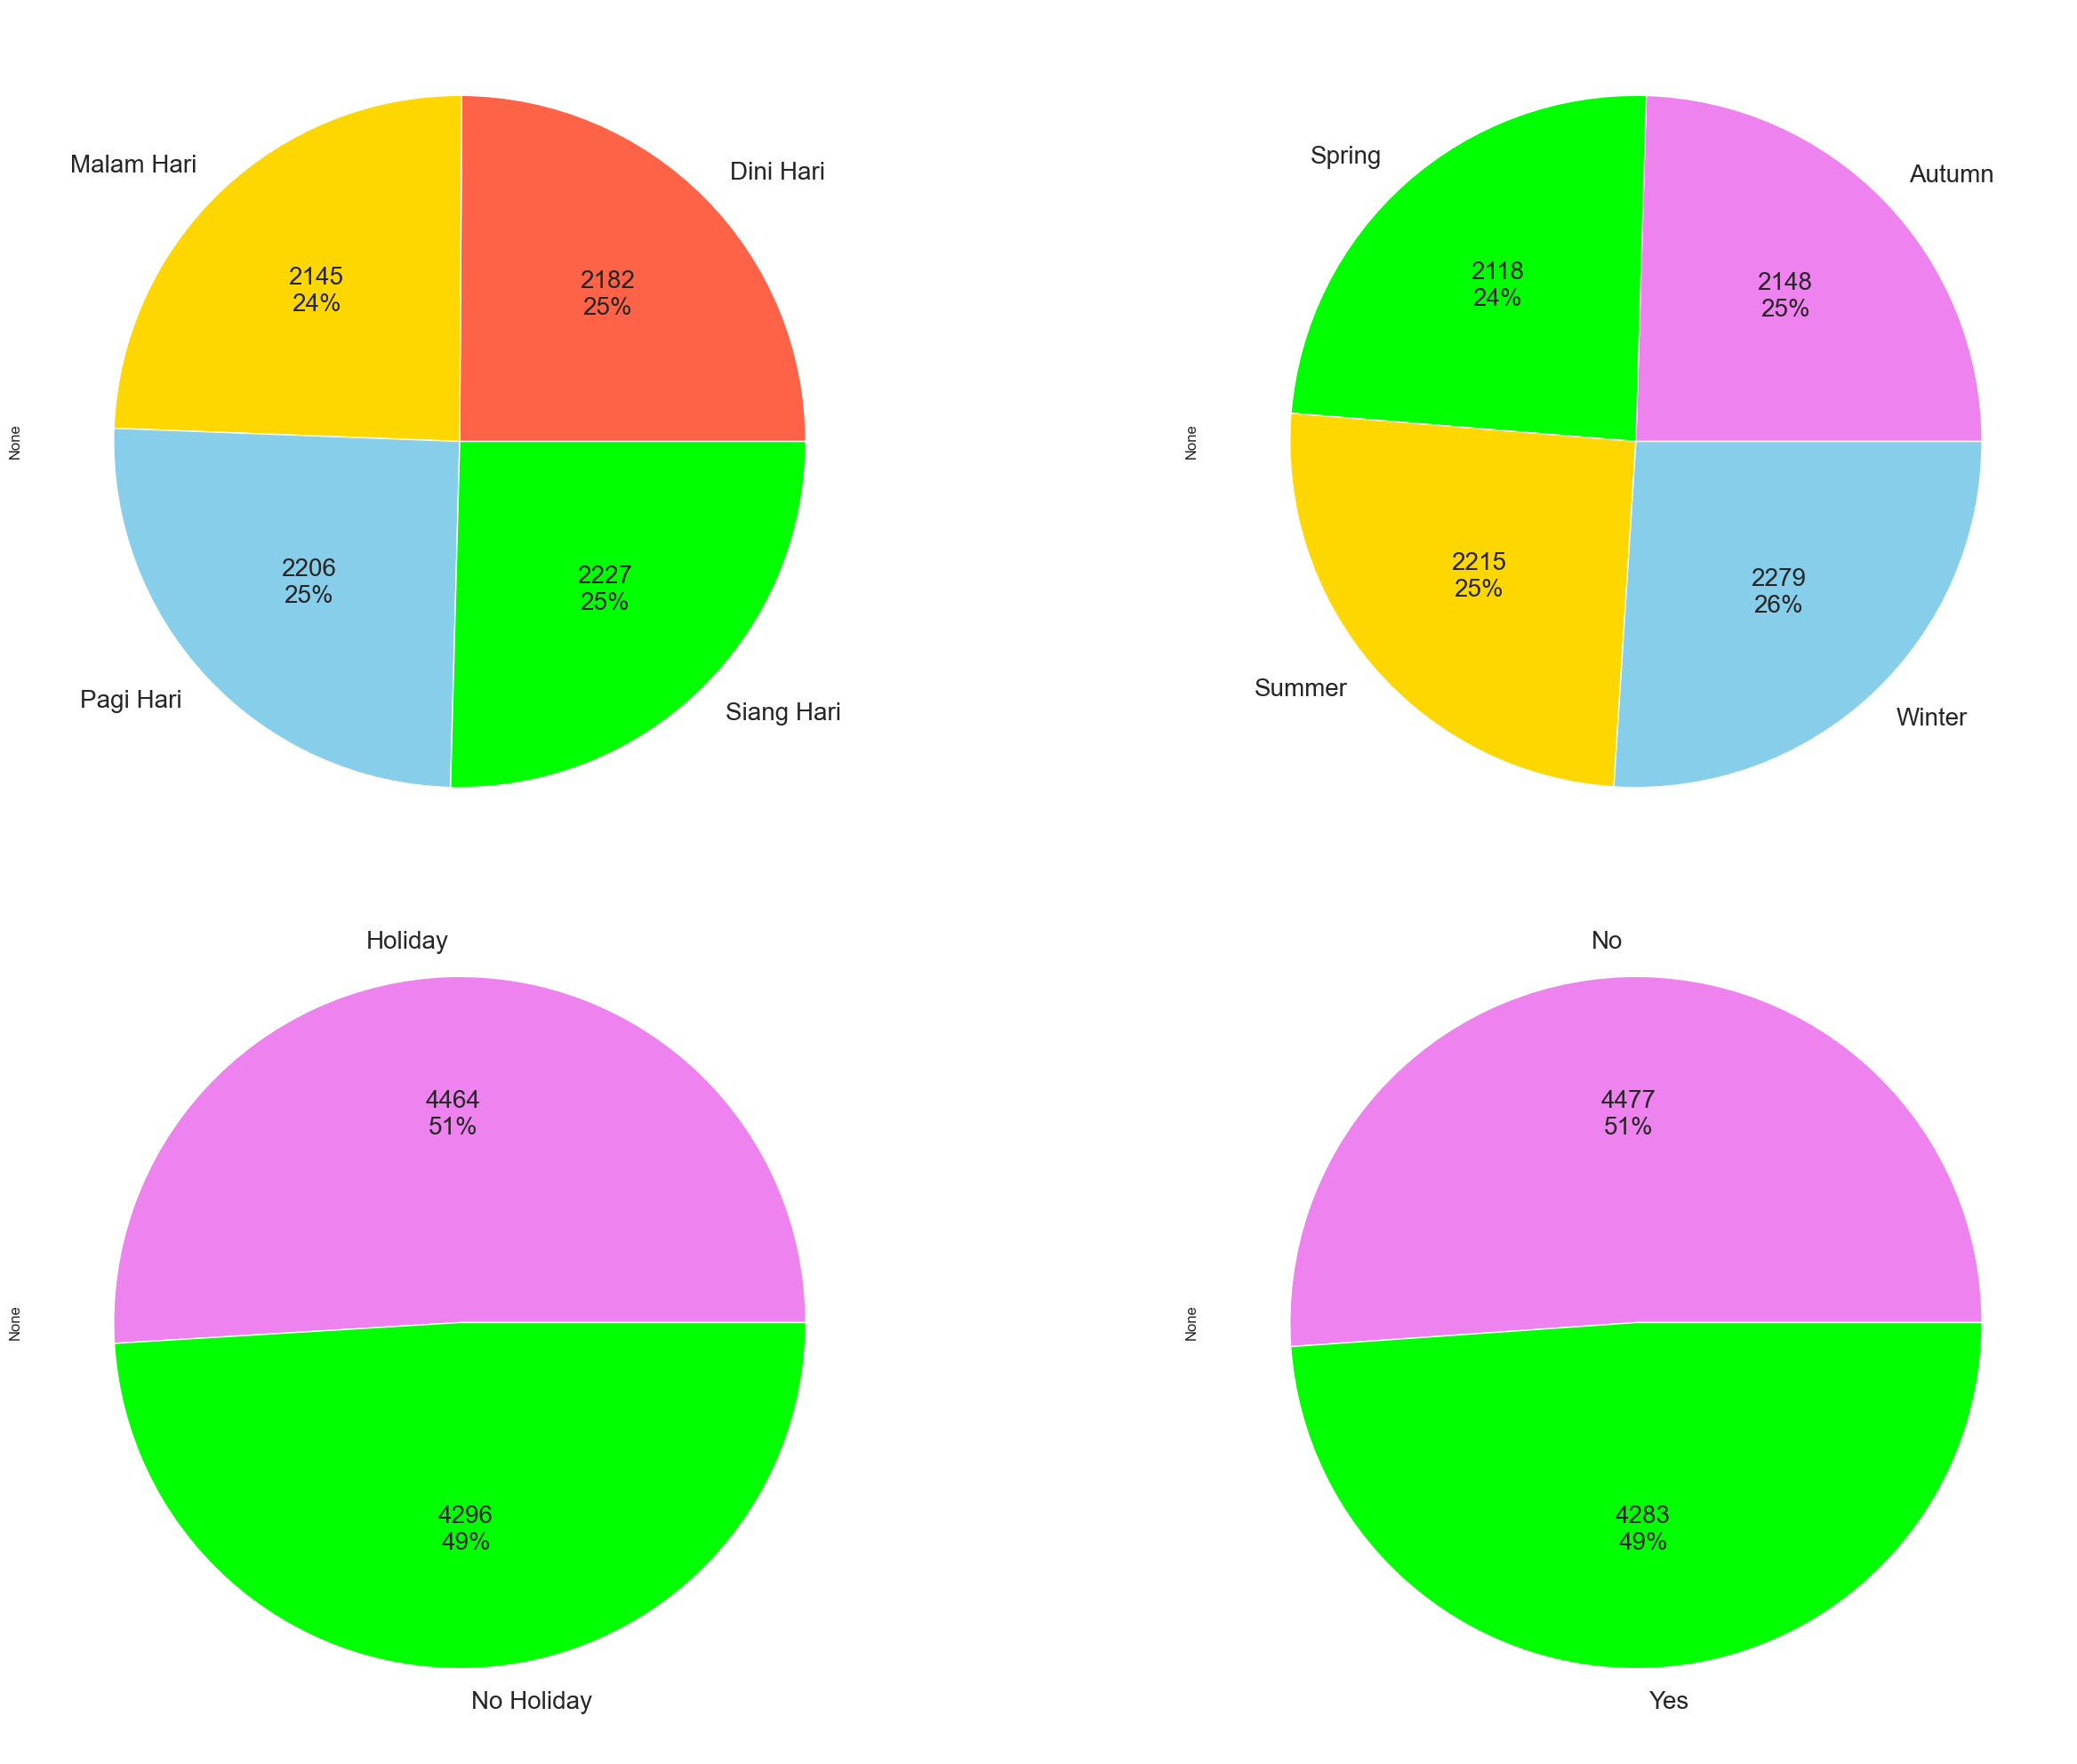

In [17]:
# check proporsi on categorical columns
data_pie = data_analisa.copy()
def label_function(val):
    return f'{val / 100 * len(data_pie):.0f}\n{val:.0f}%'

N = 8760 # sum of data

# choose categorical and unique values
data_pie = pd.DataFrame({'Hour': np.random.choice(['Dini Hari', 'Pagi Hari', 'Siang Hari', 'Malam Hari'], N),
                             'Seasons': np.random.choice(['Winter', 'Spring', 'Summer', 'Autumn'], N),
                             'Holiday' : np.random.choice (['No Holiday','Holiday'], N),
                             'Functioning Day' : np.random.choice (['Yes','No'], N) })

fig, axes = plt.subplots(2, 2, figsize=(30, 20)) # make axis

data_pie.groupby('Hour').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue','lime'], ax=axes[0, 0])
data_pie.groupby('Seasons').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['violet', 'lime','gold', 'skyblue'], ax=axes[0, 1])
data_pie.groupby('Holiday').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['violet', 'lime','gold', 'skyblue'], ax=axes[1, 0])
data_pie.groupby('Functioning Day').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['violet', 'lime','gold', 'skyblue'], ax=axes[1, 1])
plt.tight_layout()
plt.show()

In [18]:
# agregation of category vs numerical (to ouctome)

agg_hour = data_analisa.groupby(["Hour"]).agg({"Rented Bike Count":["count","mean","median","sum"]})
agg_seasons = data_analisa.groupby(["Seasons"]).agg({"Rented Bike Count":["count","mean","median","sum"]})
agg_holiday = data_analisa.groupby(["Holiday"]).agg({"Rented Bike Count":["count","mean","median","sum"]})
agg_func = data_analisa.groupby(["Functioning Day"]).agg({"Rented Bike Count":["count","mean","median","sum"]})

In [19]:
agg_hour

Rented Bike Count                            
                       count        mean median      sum
Hour                                                    
Dini Hari               2555  290.263405  206.0   741623
Malam Hari              1825  977.896986  922.0  1784662
Pagi Hari               2190  682.634247  636.0  1494969
Siang Hari              2190  982.219178  889.5  2151060

In [20]:
agg_seasons

Rented Bike Count                             
                    count         mean median      sum
Seasons                                               
Autumn               2184   819.597985  763.5  1790002
Spring               2208   730.031250  583.0  1611909
Summer               2208  1034.073370  905.5  2283234
Winter               2160   225.541204  203.0   487169

In [21]:
agg_holiday

Rented Bike Count                            
                       count        mean median      sum
Holiday                                                 
Holiday                  432  499.756944  240.0   215895
No Holiday              8328  715.228026  524.5  5956419

In [22]:
agg_func

Rented Bike Count                            
                            count        mean median      sum
Functioning Day                                              
No                            295    0.000000    0.0        0
Yes                          8465  729.156999  542.0  6172314

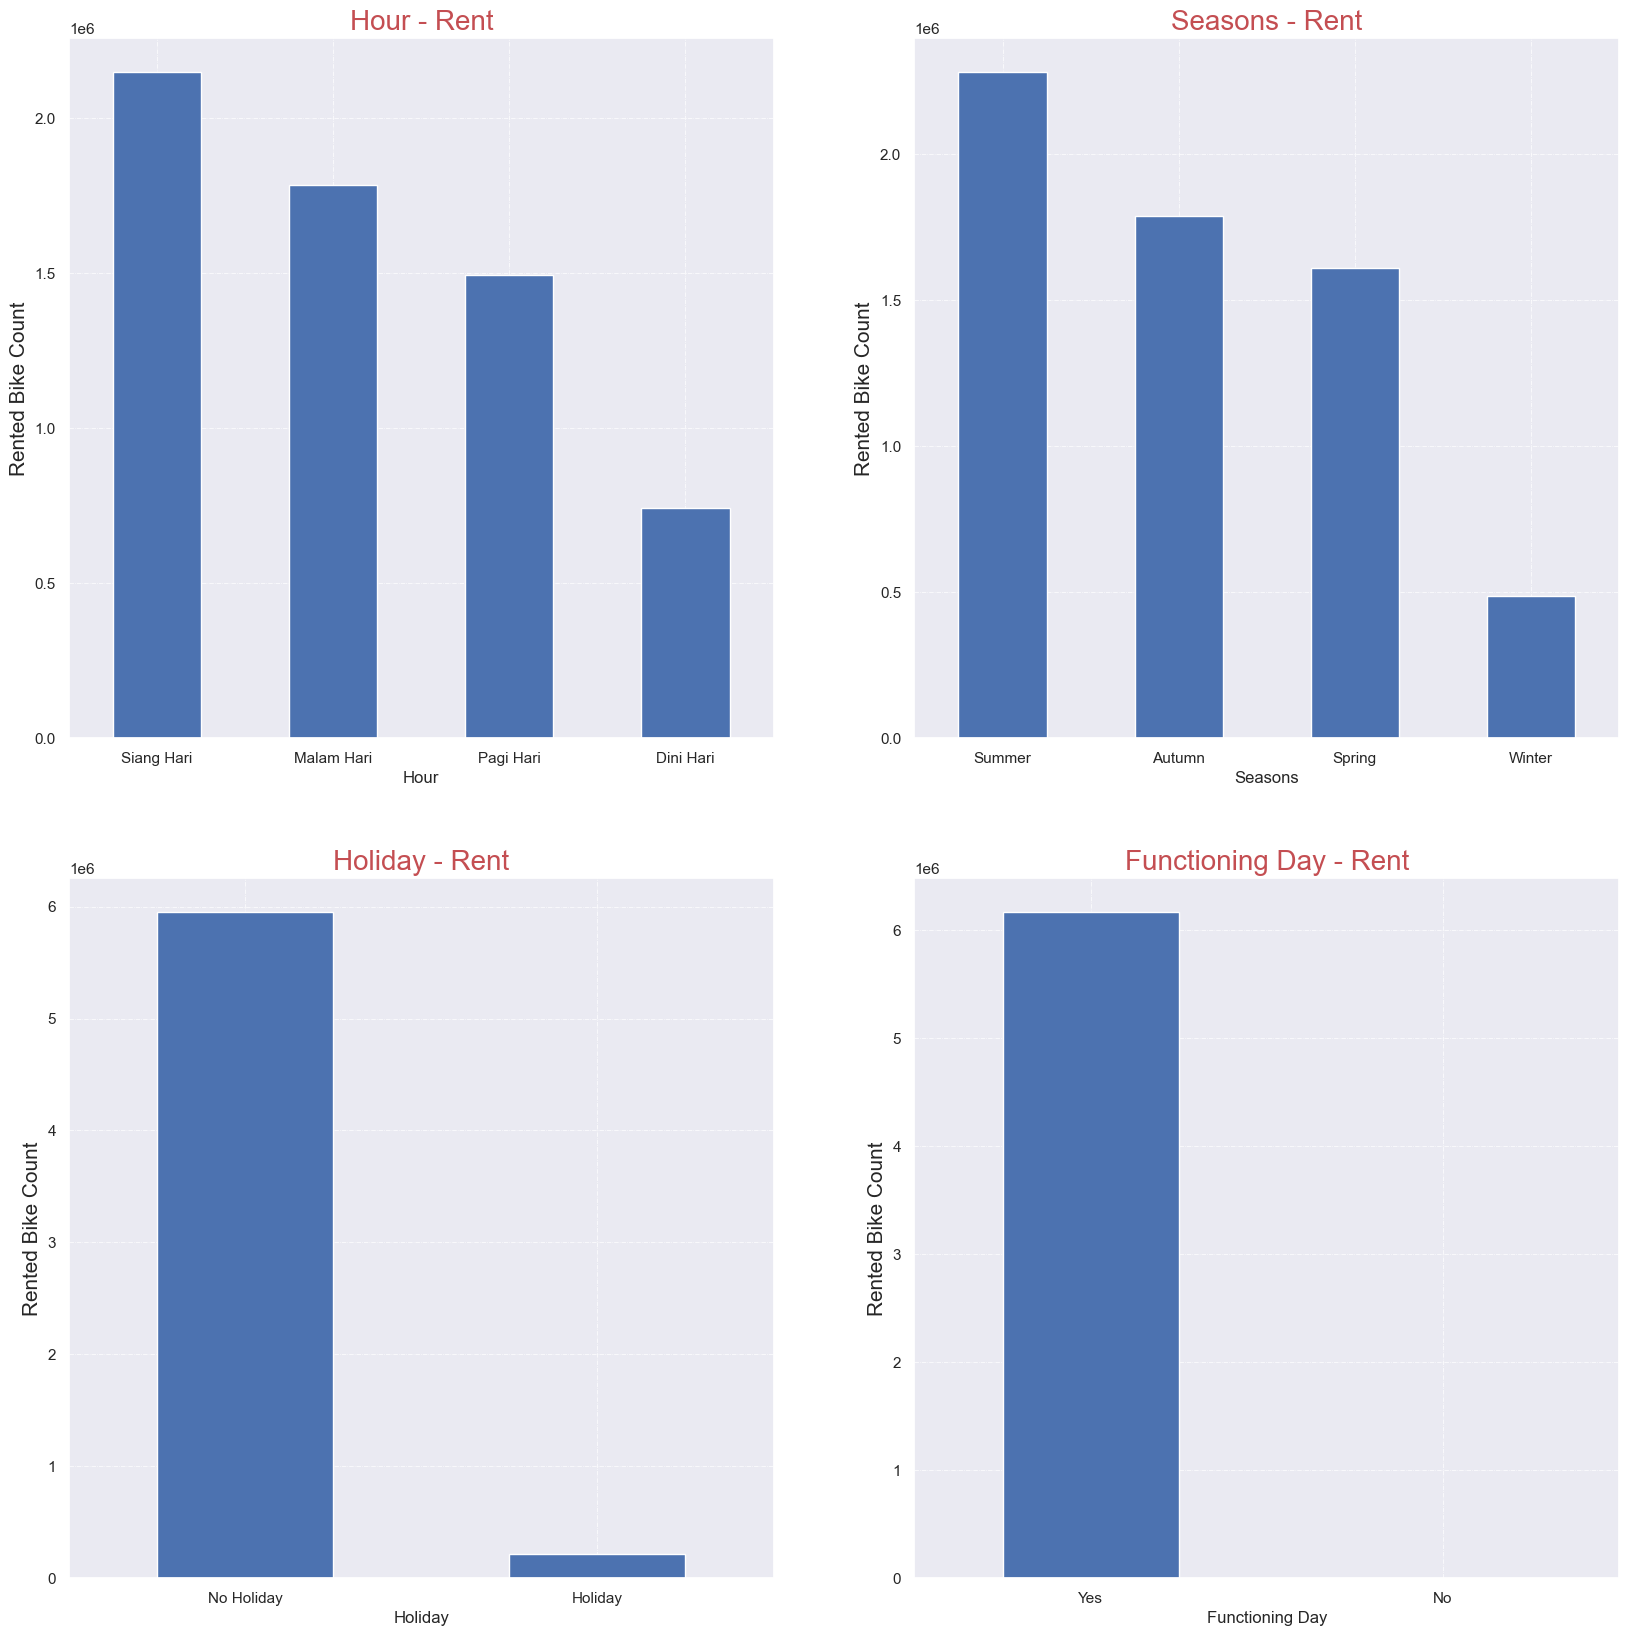

In [23]:
# visualization condition Seasons, Holiday, Functioning Day, dan Hour
hour_rent = data_analisa.groupby(['Hour'])['Rented Bike Count'].sum().sort_values(ascending=False)
seasons_rent = data_analisa.groupby(['Seasons'])['Rented Bike Count'].sum().sort_values(ascending=False)
holiday_rent = data_analisa.groupby(['Holiday'])['Rented Bike Count'].sum().sort_values(ascending=False)
funct_rent = data_analisa.groupby(['Functioning Day'])['Rented Bike Count'].sum().sort_values(ascending=False)

# Visualization hour-rent
plt.subplot(2, 2, 1)
hour_rent.plot(x="Rented Bike Count", y="Hour", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Hour - Rent", size = 20, c = 'r')
plt.ylabel('Rented Bike Count', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

# Visualization Seasons-rent
plt.subplot(2, 2, 2)
seasons_rent.plot(x="Rented Bike Count", y="Seasons", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Seasons - Rent", size = 20, c = 'r')
plt.ylabel('Rented Bike Count', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

# Visualization Holiday-rent
plt.subplot(2, 2, 3)
holiday_rent.plot(x="Rented Bike Count", y="Holiday", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Holiday - Rent", size = 20, c = 'r')
plt.ylabel('Rented Bike Count', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

# Visualization Seasons-rent
plt.subplot(2, 2, 4)
funct_rent.plot(x="Rented Bike Count", y="Functioning Day", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Functioning Day - Rent", size = 20, c = 'r')
plt.ylabel('Rented Bike Count', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

In [24]:
data_analisa.describe()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [25]:
# make bin for simplify analysis
data_analisa['bin_rainfall'] = pd.cut(
                            data_analisa['Rainfall(mm)'],
                            [0,0.5,20,35], 
                            right=False, 
                            labels=list('ABC'))

data_analisa['bin_snowfall'] = pd.cut(
                            data_analisa['Snowfall (cm)'],
                            [0,5,9], 
                            right=False, 
                            labels=list('AB'))

data_analisa['bin_temp'] = pd.cut(
                            data_analisa['Temperature(°C)'],
                            [-17,0,19,25,30,39], 
                            right=False, 
                            labels=list('ABCDE'))

In [26]:
#list bin_rainfall 
# A = Tidak hujan
# B = Hujan Ringan
# C = Hujan Sedang

#list bin_rainfall 
# A = Salju ringan
# B = salju sedang

#list bin_temp 
# A = Sangat dingin 
# B = Dingin
# C = Normal
# D = Panas
# E = Sangat panas

rainfall = data_analisa.groupby(["bin_rainfall"])["Rented Bike Count"].sum().sort_values(ascending=False)
snowfall = data_analisa.groupby(["bin_snowfall"])["Rented Bike Count"].sum().sort_values(ascending=False)
temperature = data_analisa.groupby(["bin_temp"])["Rented Bike Count"].sum().sort_values(ascending=False)

rainfall, snowfall, temperature

(bin_rainfall
 A    6108442
 B      62923
 C        798
 Name: Rented Bike Count, dtype: int64,
 bin_snowfall
 A    6171270
 B       1044
 Name: Rented Bike Count, dtype: int64,
 bin_temp
 B    2356974
 C    1716580
 D    1232221
 E     580693
 A     283044
 Name: Rented Bike Count, dtype: int64)

In [27]:
# drop columns bin
data_analisa = data_analisa.drop(columns=['bin_rainfall','bin_snowfall','bin_temp'])

# Correlation

In [28]:
# Categoric VS Categoric use chisquare

import researchpy as rp

results_1 = rp.crosstab(data_analisa['Hour'], 
                                 data_analisa['Seasons'], 
                                 prop= 'col', test= 'chi-square')

results_2 = rp.crosstab(data_analisa['Holiday'], 
                                 data_analisa['Functioning Day'], 
                                 prop= 'col', test= 'chi-square')

results_3 = rp.crosstab(data_analisa['Hour'], 
                                 data_analisa['Holiday'], 
                                 prop= 'col', test= 'chi-square')

results_4 = rp.crosstab(data_analisa['Hour'], 
                                 data_analisa['Functioning Day'], 
                                 prop= 'col', test= 'chi-square')

results_5 = rp.crosstab(data_analisa['Holiday'], 
                                 data_analisa['Seasons'], 
                                 prop= 'col', test= 'chi-square')

results_6 = rp.crosstab(data_analisa['Seasons'], 
                                 data_analisa['Functioning Day'], 
                                 prop= 'col', test= 'chi-square')

In [29]:
# look p-value
results_1, results_2, results_3, results_4, results_5, results_6

# 2,4,5,6 berkolerasi

((           Seasons                                
  Seasons     Autumn  Spring  Summer  Winter     All
  Hour                                              
  Dini Hari    29.17   29.17   29.17   29.17   29.17
  Malam Hari   20.83   20.83   20.83   20.83   20.83
  Pagi Hari    25.00   25.00   25.00   25.00   25.00
  Siang Hari   25.00   25.00   25.00   25.00   25.00
  All         100.00  100.00  100.00  100.00  100.00,
                  Chi-square test  results
  0  Pearson Chi-square ( 9.0) =       0.0
  1                    p-value =       1.0
  2                 Cramer's V =       0.0),
 (                Functioning Day                
  Functioning Day              No     Yes     All
  Holiday                                        
  Holiday                    8.14    4.82    4.93
  No Holiday                91.86   95.18   95.07
  All                      100.00  100.00  100.00,
                  Chi-square test  results
  0  Pearson Chi-square ( 1.0) =    6.6848
  1           

In [30]:
#Check correlation numeric vs category with spearman (numeric is outcome column)
from scipy.stats import spearmanr # method for correlation numeric VS categoric

def correlation_spearman (x_column, y_column):
        """
        Function for correlation numeric vs categoric
        you must input two column, one numeric and 
        one categoric
        """
        # input data and Choose column integer
        x = data_analisa[x_column] # input data (change column data input for check)
        y = data_analisa[y_column] # data ouput

        # print data
        corr, _ = spearmanr(x, y)
        print('Spearmans correlation: %.3f' % corr)

In [31]:
# important places
correlation_spearman('Rented Bike Count', 'Hour')
correlation_spearman('Rented Bike Count', 'Functioning Day')
correlation_spearman('Rented Bike Count', 'Holiday')
correlation_spearman('Rented Bike Count', 'Seasons')

Spearmans correlation: 0.376
Spearmans correlation: 0.312
Spearmans correlation: 0.091
Spearmans correlation: -0.272


C:\Users\HP Notebook\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


<AxesSubplot:>

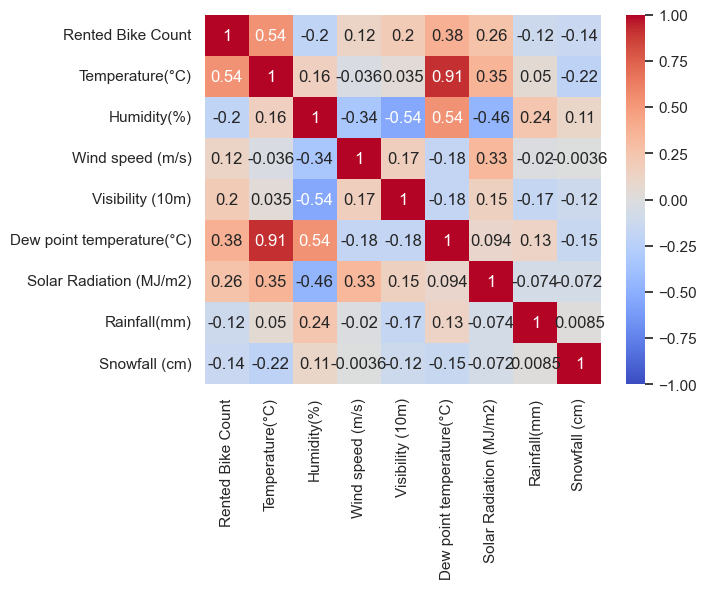

In [32]:
# check correlation between the two numeric with kernell method because we look visualization pairplot have all linier
corr = data_analisa.corr(method='pearson')

# Membuat heatmap korelasi kernel dengan library Seaborn
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

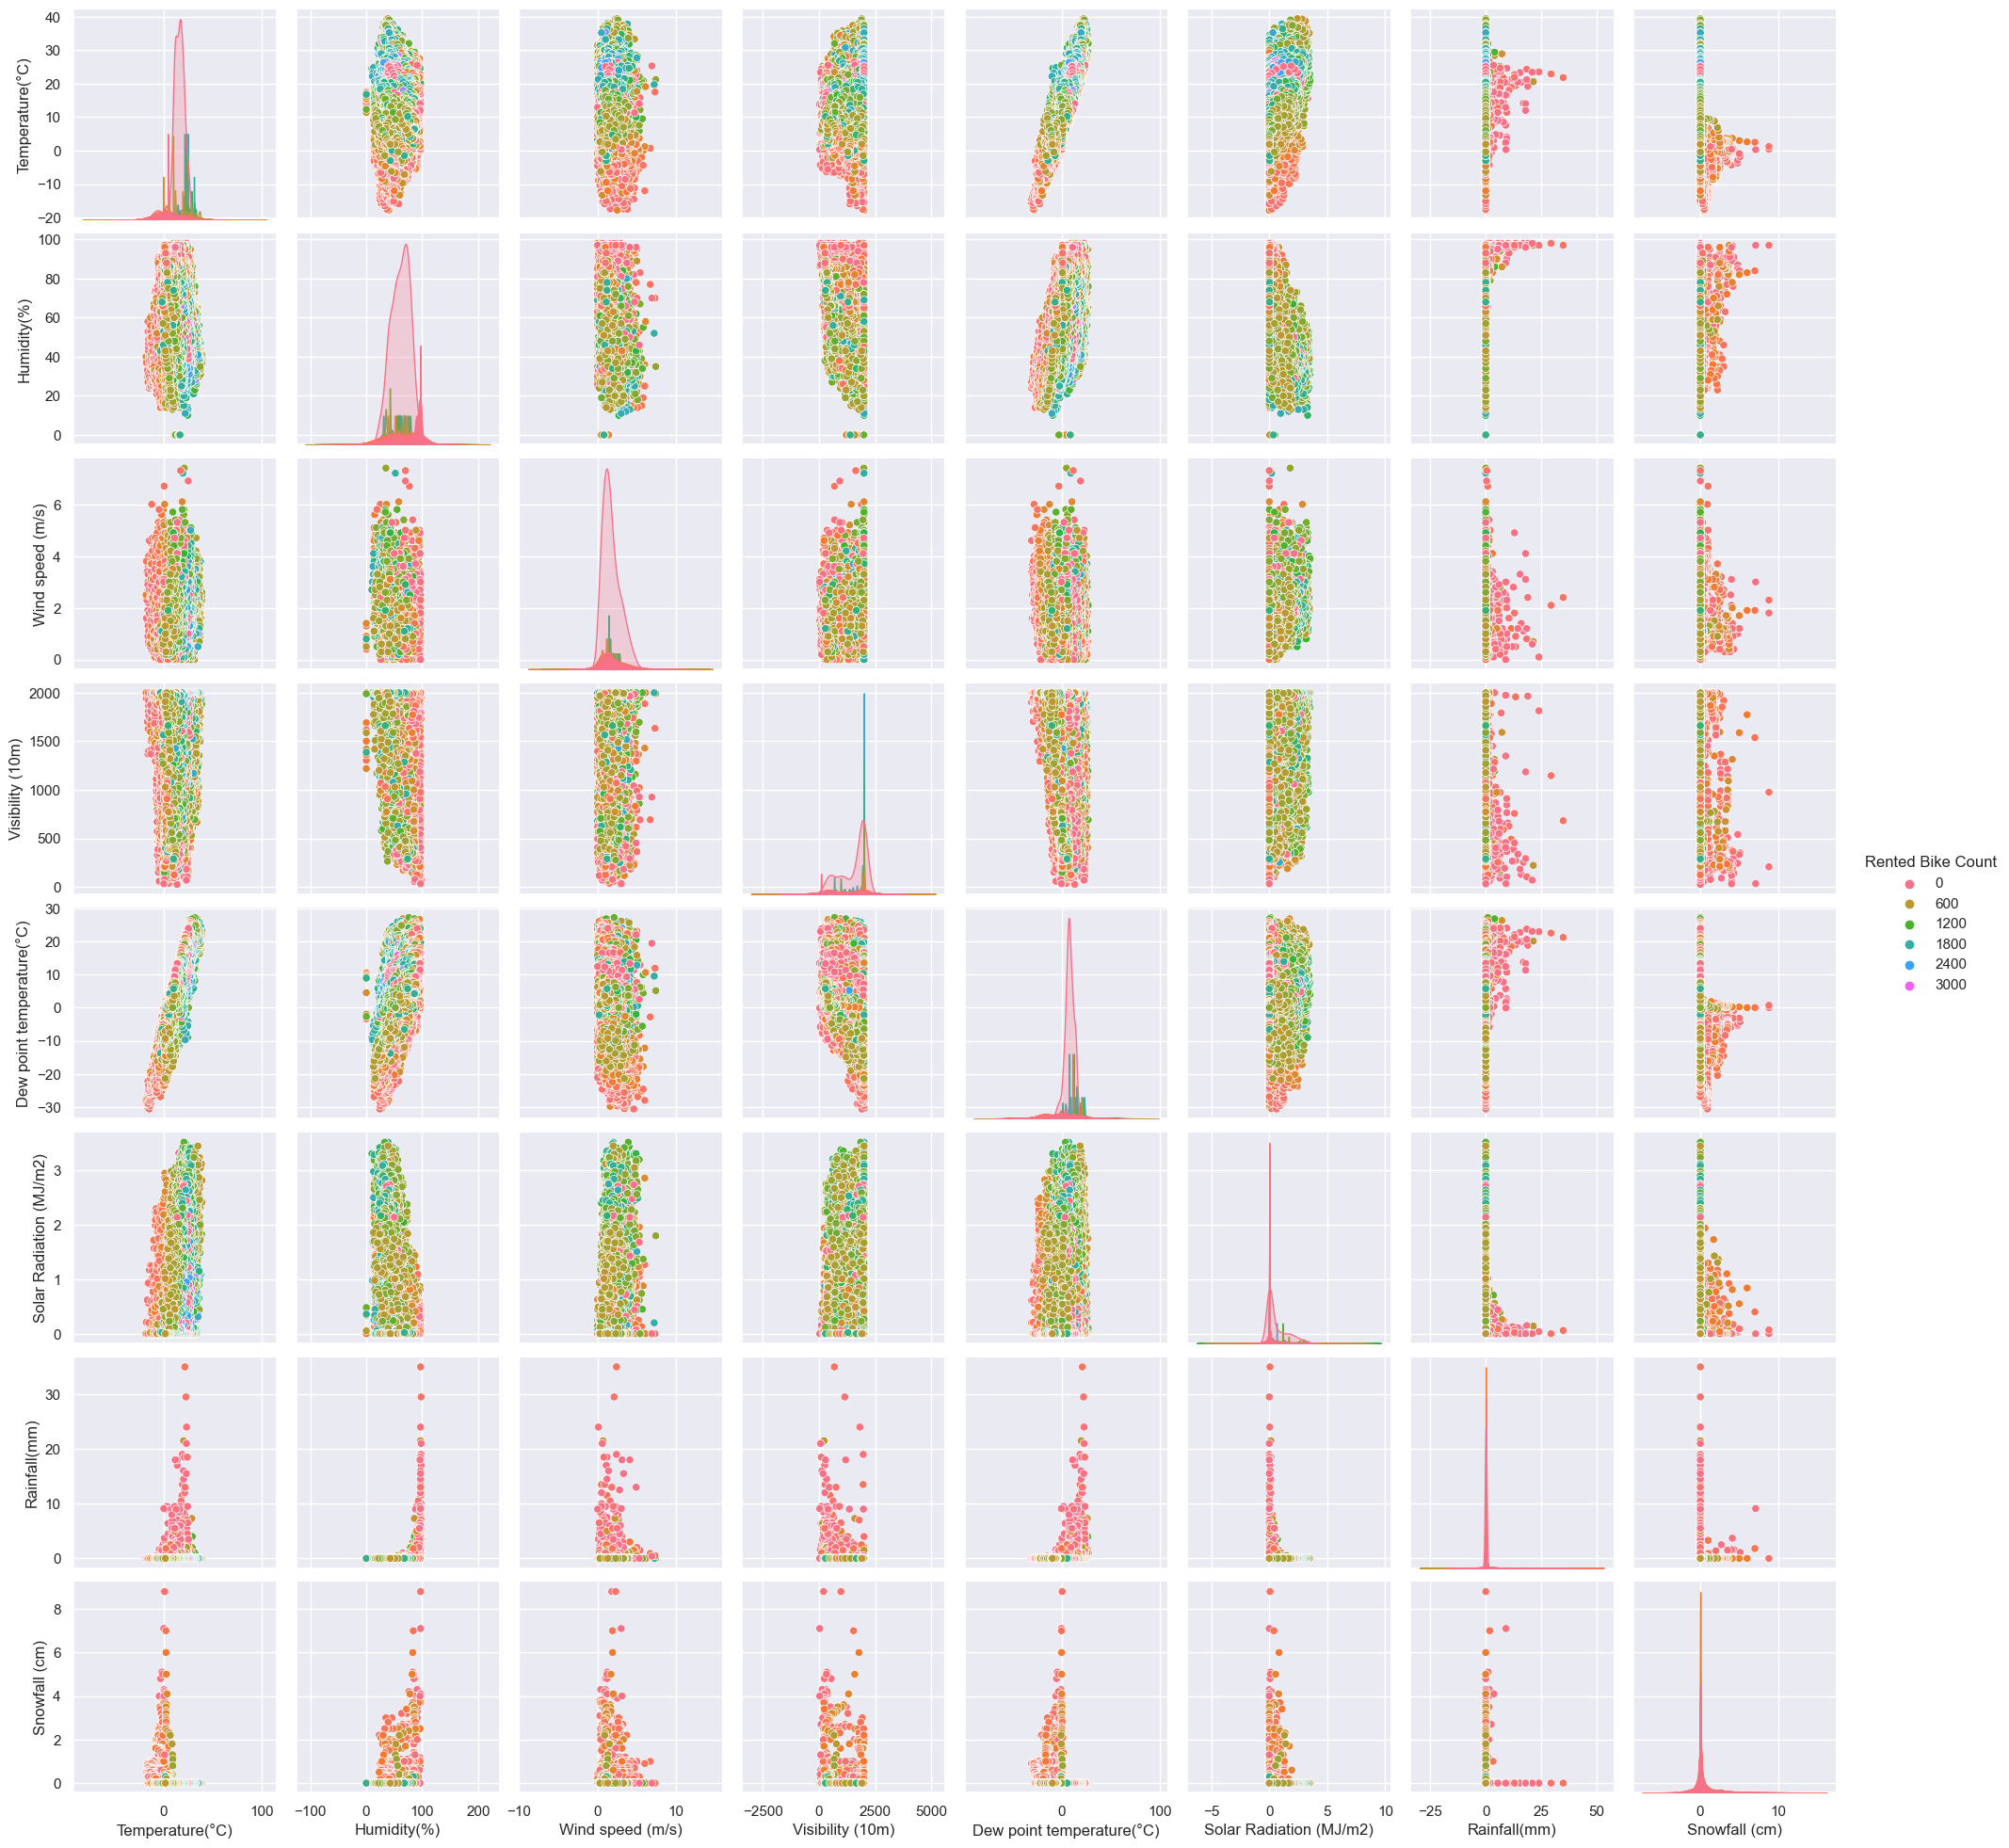

In [33]:
# pairplot linier
sns.pairplot(data_analisa, hue ='Rented Bike Count',palette="husl")
plt.show()

In [34]:
#save data for next step, is hipotesis
joblib.dump(data_analisa, "D:/BOOTCAMP/project/(Block 4) Business Statistik/data_hipotesis.csv")

['D:/BOOTCAMP/project/(Block 4) Business Statistik/data_hipotesis.csv']